In [1]:
import sklearn.datasets

In [2]:
d = sklearn.datasets.make_multilabel_classification(n_samples=200, n_features=2, n_classes=3, n_labels=1, allow_unlabeled=False)

In [3]:
d[1][:10]

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

In [4]:
d[0][:10]

array([[35., 34.],
       [18., 36.],
       [13., 31.],
       [ 4., 43.],
       [39., 11.],
       [ 7., 38.],
       [16., 34.],
       [ 7., 44.],
       [12., 26.],
       [ 7., 39.]])

In [5]:
import matplotlib.pyplot as plt

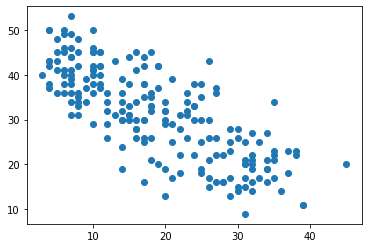

In [6]:
plt.scatter(d[0][:, 0], d[0][:, 1])

In [63]:
import pennylane as qml
import tensorflow as tf
import sklearn.datasets

n_qubits = 3
n_layers = 3
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

weight_shapes = {"weights": (n_layers, n_qubits, 3)}

In [73]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=2)
clayer1 = tf.keras.layers.Dense(3)
clayer2 = tf.keras.layers.Dense(3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation="relu"), 
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6),
#                                     qlayer, 
    tf.keras.layers.Dense(3, activation="softmax")
]
)

In [74]:
opt = tf.keras.optimizers.Adagrad()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(opt, loss=loss, metrics=['accuracy'])

In [95]:
model.fit(d[0], d[1], epochs=20, batch_size=20)

Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0854 - accuracy: 0.7700
Epoch 2/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0810 - accuracy: 0.7700
Epoch 3/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0749 - accuracy: 0.7700
Epoch 4/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0699 - accuracy: 0.7700
Epoch 5/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0668 - accuracy: 0.7650
Epoch 6/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0616 - accuracy: 0.7650
Epoch 7/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0577 - accuracy: 0.7650
Epoch 8/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0522 - accuracy: 0.7650
Epoch 9/20
10/10 [==============================] - 0s 1ms/step - loss: 2.0473 - accuracy: 0.7650
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 2.0423 - accuracy: 0.7650
Epoch 11/20
10/10 [